Toy Example From the Original PCPCA Paper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pcpca import PCPCA, CPCA

In [2]:
from pcpca import PCPCA

# test the toy example
X = pd.read_csv("C:/Users/92503/Desktop/DSA4199 FYP/pcpca git-hub/pcpca/data/toy/foreground.csv", header=None).values
Y = pd.read_csv("C:/Users/92503/Desktop/DSA4199 FYP/pcpca git-hub/pcpca/data/toy/background.csv", header=None).values
#Y = Y[ : ,0:100]
p, n = X.shape
m = Y.shape[1]

# Plot
plt.scatter(X[0, :n//2], X[1, :n//2], alpha=0.5, label="Foreground group 1", s=80, color="green")
plt.scatter(X[0, n//2:], X[1, n//2:], alpha=0.5, label="Foreground group 2", s=80, color="orange")
plt.scatter(Y[0, :], Y[1, :], alpha=0.5, label="Background", s=80, color="gray")
plt.legend()
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/92503/Desktop/DSA4199 FYP/pcpca git-hub/pcpca/data/toy/foreground.csv'

In [3]:
# Use PCPCA code on toy example
pcpca = PCPCA(gamma=0.7, n_components=1)
pcpca.fit(X, Y)

X_reduced, Y_reduced = pcpca.fit_transform(X, Y)

In [6]:
X.shape

(2, 200)

In [4]:
pcpca.W_mle

array([[-1.87429222],
       [ 1.32755581]])

Mouse Protein Data: Comparing PCPCA and CPCA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pcpca import PCPCA, CPCA

In [12]:
# Data processing for mouse protein
# Need to install "openpyxl" through pip
DATA_PATH = "C:/Users/ASUS/Desktop/DSA4199 FYP/PCPCA/CPCA & PCPCA/Mouse protein expression/Data_Cortex_Nuclear.xlsx"
data = pd.read_excel(DATA_PATH, sheet_name="Hoja1")

# Get names of proteins
protein_names = data.columns.values[1:78]

# Fill NAs
data = data.fillna(0)

# Background (Data is standarized)
Y_df = data[
    (data.Behavior == "C/S")
    & (data.Genotype == "Control")
    & (data.Treatment == "Saline")
]
Y = Y_df[protein_names].values
Y -= np.nanmean(Y, axis=0)
Y /= np.nanstd(Y, axis=0)
Y_full = Y.T


# Foreground (Data is standarized)
X_df = data[(data.Behavior == "S/C") & (data.Treatment == "Saline")]
X = X_df[protein_names].values
X -= np.nanmean(X, axis=0)
X /= np.nanstd(X, axis=0)
X_full = X.T


p, n = X_full.shape # 77*270
_, m = Y_full.shape # 77*135

# Note here to use PCPCA/CPCA built in PCPCA package, the data must be: Rows=predictors, Columns=Samples

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
X_full.shape

(77, 270)

In [9]:
pcpca = PCPCA(gamma=n / m * 0.5, n_components=2)  # Here actually gamma = 1
X_reduced, Y_reduced = pcpca.fit_transform(X_full, Y_full)

X_reduced_df = pd.DataFrame(X_reduced.T, columns=["PCPC1", "PCPC2"])
X_reduced_df["Genotype"] = X_df.Genotype.values

Y_reduced_df = pd.DataFrame(Y_reduced.T, columns=["PCPC1", "PCPC2"])
Y_reduced_df["Genotype"] = ["Background" for _ in range(Y_reduced_df.shape[0])]


AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

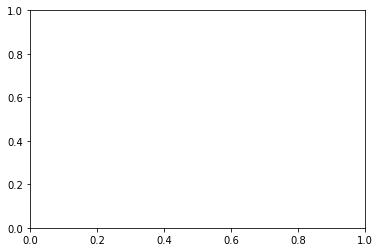

In [11]:
pcpca = PCPCA(gamma=n / m * 0.5, n_components=3)  # Here actually gamma = 1
X_reduced, Y_reduced = pcpca.fit_transform(X_full, Y_full)

X_reduced_df = pd.DataFrame(X_reduced.T, columns=["PCPC1", "PCPC2","PCPC3"])
X_reduced_df["Genotype"] = X_df.Genotype.values

Y_reduced_df = pd.DataFrame(Y_reduced.T, columns=["PCPC1", "PCPC2","PCPC3"])
Y_reduced_df["Genotype"] = ["Background" for _ in range(Y_reduced_df.shape[0])]

import seaborn as sns

results_df = pd.concat([X_reduced_df, Y_reduced_df], axis=0)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
#ax.scatter(x, y, z)

#plt.show()
#sns.scatterplot(
#    data=results_df,
#    x="PCPC1",
#    y="PCPC2",
#    z="PCPC3",
#    hue="Genotype",
#    palette=["green", "orange", "gray"],
#)

<AxesSubplot: xlabel='PCPC1', ylabel='PCPC2'>

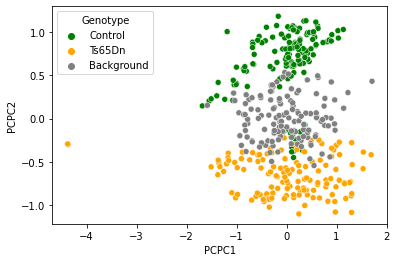

In [7]:
import seaborn as sns

results_df = pd.concat([X_reduced_df, Y_reduced_df], axis=0)
sns.scatterplot(
    data=results_df,
    x="PCPC1",
    y="PCPC2",
    hue="Genotype",
    palette=["green", "orange", "gray"],
)

In [27]:
# Silhouette Score for CPCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

N_COMPONENTS = 2
gamma_range_cpca = list(np.linspace(0, 200, 40))

# CPCA
cluster_scores_cpca = []
cpca_gamma_plot_list = []

for gamma in gamma_range_cpca:
    cpca_model = CPCA(gamma=n / m * gamma, n_components=N_COMPONENTS)
    X_reduced, Y_reduced = cpca_model.fit_transform(X_full, Y_full)


    kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced.T)

    cpca_gamma_plot_list.append(gamma)
    
    true_labels = pd.factorize(X_df.Genotype)[0]
    cluster_score = silhouette_score(X=X_reduced.T, labels=true_labels)
    print("gamma'={}, cluster score={}".format(gamma, cluster_score))
    cluster_scores_cpca.append(cluster_score)

gamma'=0.0, cluster score=0.0533129918602624
gamma'=5.128205128205129, cluster score=0.4339824972140598
gamma'=10.256410256410257, cluster score=0.43484764439023804
gamma'=15.384615384615387, cluster score=0.43137183514955674
gamma'=20.512820512820515, cluster score=0.4295560114266341
gamma'=25.641025641025642, cluster score=0.42939865053918985
gamma'=30.769230769230774, cluster score=0.43036297195324613
gamma'=35.8974358974359, cluster score=0.43203656882550556
gamma'=41.02564102564103, cluster score=0.43412285278099194
gamma'=46.15384615384616, cluster score=0.4364266382438044
gamma'=51.282051282051285, cluster score=0.4388181727891957
gamma'=56.410256410256416, cluster score=0.4411862780577513
gamma'=61.53846153846155, cluster score=0.44342381717559487
gamma'=66.66666666666667, cluster score=0.44541488177457106
gamma'=71.7948717948718, cluster score=0.44705151543169674
gamma'=76.92307692307693, cluster score=0.44823045914152565
gamma'=82.05128205128206, cluster score=0.4488403983941

Exception: Some of the first n_components eigenvalues are negative. Try lowering gamma or reducing n_components.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


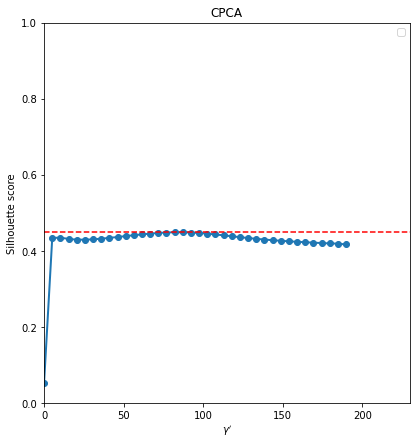

In [28]:
# Silhouette Score Plot for CPCA
plt.figure(figsize=(38, 7))
plt.subplot(151)
plt.plot(cpca_gamma_plot_list, cluster_scores_cpca, "-o", linewidth=2)
plt.title("CPCA")
plt.ylim([0, 1])
plt.xlim([0, cpca_gamma_plot_list[-1] + 40])
#plt.axvline(cpca_fail_gamma, color="black", linestyle="--")
plt.axhline(np.max(cluster_scores_cpca), color="red", linestyle="--")
plt.xlabel(r"$\gamma^\prime$")
plt.ylabel("Silhouette score")
plt.legend()

In [52]:
X_df.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
435,3422_1,0.304966,0.477769,0.319786,2.596944,4.447364,0.227196,0.176165,4.218640,0.203972,...,0.126152,0.418097,0.136876,0.175802,0.179059,0.959882,Control,Saline,S/C,c-SC-s
436,3422_2,0.298968,0.480565,0.315214,2.626784,4.473428,0.232007,0.175068,4.259338,0.201488,...,0.142504,0.399409,0.136197,0.181542,0.171803,0.934616,Control,Saline,S/C,c-SC-s
437,3422_3,0.303297,0.485640,0.321380,2.606443,4.681811,0.228233,0.173986,4.226105,0.208479,...,0.142271,0.398784,0.138876,0.186010,0.164061,0.870125,Control,Saline,S/C,c-SC-s
438,3422_4,0.303962,0.454134,0.314818,2.414511,4.004704,0.229781,0.182016,3.950606,0.196309,...,0.125603,0.399479,0.140942,0.187826,0.177889,1.000482,Control,Saline,S/C,c-SC-s
439,3422_5,0.302761,0.473041,0.322587,2.527886,4.099685,0.242727,0.180656,4.016491,0.197517,...,0.142253,0.393406,0.144848,0.197616,0.173395,0.983756,Control,Saline,S/C,c-SC-s
440,3422_6,0.326898,0.478725,0.315464,2.611246,4.242737,0.238238,0.176382,4.065042,0.201125,...,0.139441,0.427607,0.141692,0.210240,0.175919,0.890004,Control,Saline,S/C,c-SC-s
441,3422_7,0.287837,0.446959,0.312071,2.368999,3.576132,0.243484,0.187014,3.661866,0.200732,...,0.143539,0.364850,0.151745,0.207226,0.191304,0.974770,Control,Saline,S/C,c-SC-s
442,3422_8,0.293135,0.453547,0.308009,2.392220,3.738902,0.236384,0.191533,3.610984,0.196568,...,0.134814,0.368427,0.152941,0.209124,0.188956,0.928331,Control,Saline,S/C,c-SC-s
443,3422_9,0.283922,0.457013,0.322463,2.389054,3.763512,0.251311,0.186545,3.607526,0.192474,...,0.154992,0.372769,0.165210,0.227010,0.195125,0.950142,Control,Saline,S/C,c-SC-s
444,3422_10,0.299733,0.424000,0.309600,2.222667,3.219733,0.258133,0.190933,3.238133,0.183467,...,0.149251,0.365642,0.168250,0.232652,0.224602,0.993721,Control,Saline,S/C,c-SC-s


In [53]:
gamma_range_pcpca = list(np.linspace(0, 0.99, 40))
N_COMPONENTS = 6
# Silhouette Score for PCPCA
cluster_scores_pcpca = []
pcpca_gamma_plot_list = []

for gamma in gamma_range_pcpca:
    pcpca_model = PCPCA(gamma=n / m * gamma, n_components=N_COMPONENTS)
    X_reduced, Y_reduced = pcpca_model.fit_transform(X_full, Y_full)

    #kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced.T)
    data_full = np.concatenate((X_reduced.T, Y_reduced.T))

    pcpca_gamma_plot_list.append(gamma)
    true_labels = ["0"]*135+["1"]*135+["2"]*135
    cluster_score = silhouette_score(X=data_full, labels=true_labels)
    print("gamma'={}, cluster score={}".format(gamma, cluster_score))
    cluster_scores_pcpca.append(cluster_score)

gamma'=0.0, cluster score=0.03621659752339404
gamma'=0.025384615384615384, cluster score=0.0346055429281855
gamma'=0.05076923076923077, cluster score=0.03304324854951505
gamma'=0.07615384615384616, cluster score=0.031520201166313475
gamma'=0.10153846153846154, cluster score=0.030028733015727657
gamma'=0.12692307692307692, cluster score=0.028562697304451927
gamma'=0.1523076923076923, cluster score=0.027117762711173957
gamma'=0.17769230769230768, cluster score=0.025691229985298377
gamma'=0.20307692307692307, cluster score=0.02427806653849609
gamma'=0.22846153846153847, cluster score=0.022864947445256474
gamma'=0.25384615384615383, cluster score=0.021470619481387294
gamma'=0.2792307692307692, cluster score=0.02010072163582627
gamma'=0.3046153846153846, cluster score=0.01876281430107531
gamma'=0.33, cluster score=0.017466560035832853
gamma'=0.35538461538461535, cluster score=0.016233154499855414
gamma'=0.38076923076923075, cluster score=0.015088176390222212
gamma'=0.40615384615384614, clus

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36224\2730386441.py:6: UserWarning: The palette list has more values (405) than needed (2), which may not be intended.
  sns.scatterplot(


ValueError: Invalid RGBA argument: 0

Error in callback <function _draw_all_if_interactive at 0x000001572B7FF670> (for post_execute):


ValueError: Invalid RGBA argument: 0

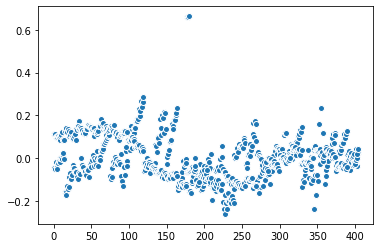

In [48]:
X_reduced.shape
data_full.shape

import seaborn as sns

sns.scatterplot(
    data=data_full,
    palette=true_labels,
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_36224\1458601024.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(152)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


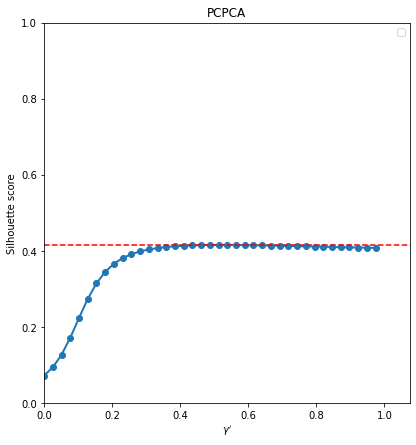

In [30]:
plt.figure(figsize=(38, 7))
plt.xlabel(r"$\gamma^\prime$")
plt.ylabel("Silhouette score")
plt.legend()
plt.subplot(152)
plt.plot(pcpca_gamma_plot_list, cluster_scores_pcpca, "-o", linewidth=2)
plt.title("PCPCA")
plt.ylim([0, 1])
plt.xlim([0, pcpca_gamma_plot_list[-1] + 0.1])
#plt.axvline(pcpca_fail_gamma, color="black", linestyle="--")
plt.axhline(np.max(cluster_scores_pcpca), color="red", linestyle="--")
#plt.axhline(clvm_cluster_score, color="blue", linestyle="--", label="CLVM")
plt.xlabel(r"$\gamma^\prime$")
plt.ylabel("Silhouette score")
plt.legend()
